# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [3]:
# Місце для Вашого коду

import numpy as np
from scipy.stats import rv_discrete


def create(n):
    """ Function that creates the random discrete value from task using the 
    scipy.stats.rv_discrete
    """
    space = np.arange(1, 2*n + 1)
    probabilities = np.log(space)
    k = 1 / sum(probabilities)
    probabilities *= k
    lognew = rv_discrete(name='lognew', values=(space, probabilities))
    return lognew


randval1 = create(10)
randval2 = create(25)

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

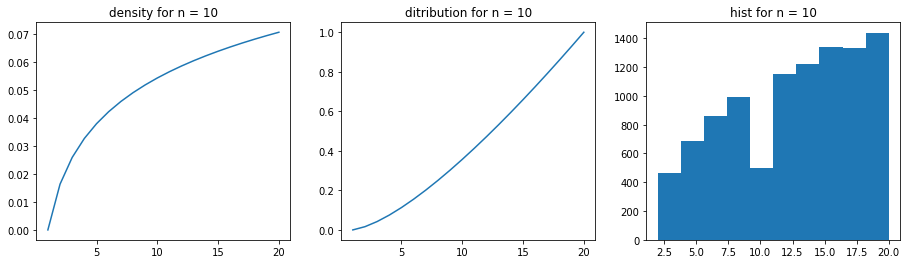

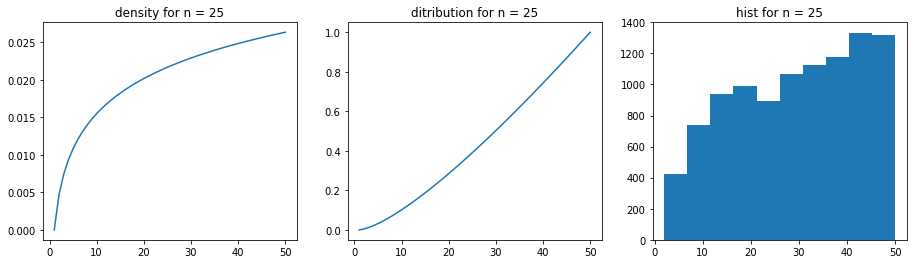

In [18]:
# Місце для Вашого коду

import matplotlib.pyplot as plt

n = 10
test_space = np.arange(1, 2*n + 1)

# it sets the padding of each subplot
plt.subplots_adjust(left=2, right=4)

plt.subplot(1, 3, 1, title=f'density for n = {n}')
plt.plot(test_space, randval1.pmf(test_space))
plt.subplot(1, 3, 2, title=f'ditribution for n = {n}')
plt.plot(test_space, randval1.cdf(test_space))
plt.subplot(1, 3, 3, title=f'hist for n = {n}')
plt.hist(randval1.rvs(size=10000))
plt.show()

n = 25
test_space = np.arange(1, 2*n + 1)

# it sets the padding of each subplot
plt.subplots_adjust(left=2, right=4)

plt.subplot(1, 3, 1, title=f'density for n = {n}')
plt.plot(test_space, randval2.pmf(test_space))
plt.subplot(1, 3, 2, title=f'ditribution for n = {n}')
plt.plot(test_space, randval2.cdf(test_space))
plt.subplot(1, 3, 3, title=f'hist for n = {n}')
plt.hist(randval2.rvs(size=10000))
plt.show()


### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [25]:
# Місце для Вашого коду

# This is the answer to the question in the title (for odd and even number)

for n, rand in [(10, randval1), (25, randval2)]:
    tmp_odd = np.arange(1, 2*n + 1, 2)
    tmp_even = np.arange(2, 2*n + 1, 2)
    print(f'n = {n}, for odd:', sum(rand.pmf(tmp_odd)))
    print(f'n = {n}, for even:', sum(rand.pmf(tmp_even)))
    print()


n = 10, for odd: 0.47949537007207715
n = 10, for even: 0.5205046299279227

n = 25, for odd: 0.49263592601410955
n = 25, for even: 0.5073640739858903



### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [26]:
# Місце для Вашого коду

from collections import Counter

# This is the answer to the question in the title (for odd and even number)

for n, rand in [(10, randval1), (25, randval2)]:
    tmp_odd = np.arange(1, 2*n + 1, 2)
    tmp_even = np.arange(2, 2*n + 1, 2)
    
    exper = Counter(rand.rvs(size=1000000))
    res_odd = sum([exper[el] for el in tmp_odd])
    res_even = sum([exper[el] for el in tmp_even])
    print(f'n = {n}, for odd:', res_odd / 1000000)
    print(f'n = {n}, for even:', res_even / 1000000)
    print()
    

n = 10, for odd: 0.479848
n = 10, for even: 0.520152

n = 25, for odd: 0.491924
n = 25, for even: 0.508076

